<a href="https://colab.research.google.com/github/NikhilGupta963/Aerofit-Business-Case-Study/blob/main/delhivery_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

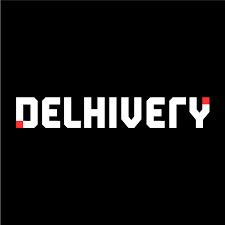

# **DELHIVERY- case study - Nikhil Gupta**

# **About Delhivery**

*Delhivery is India’s largest fully integrated logistics provider. We aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality and cutting-edge engineering and technology capabilities.*

**Why this case study**

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

It wants to understand and process the data coming out of data engineering pipelines. So we need to

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

• Detectiong outliers to refine the process of delivry and enhance the quality of services.[link text](https://)

# **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/datasets"

**Import necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

**Read Dataset**

In [ ]:
data = pd.read_csv(path+"/delhivery_data.csv")
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


**Taking the overview of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
data.shape

(144867, 24)

**Dropping all the null values**

In [ ]:
data = data.dropna(how = 'any')
data = data.reset_index(drop=True)

**Converting string to dateTime values**

In [ ]:
data['od_start_time'] = pd.to_datetime(data['od_start_time'])
data['od_end_time'] = pd.to_datetime(data['od_end_time'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

**Grouping the Segments like trip_uuid, source_center, destination_center and to get their cumulative sum**

In [ ]:
data["segment_key"] = data['trip_uuid'] + data['source_center'] + data['destination_center']
segment_columns = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_columns:
    data[col + '_sum'] = data.groupby('segment_key')[col].cumsum()

data[[col + '_sum' for col in segment_columns]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


**Aggregating at segment level**

In [ ]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

}

In [ ]:
grouped_segment = data.groupby('segment_key').agg(create_segment_dict).reset_index()
grouped_segment = grouped_segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()
grouped_segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [ ]:
grouped_segment[grouped_segment["trip_uuid"] == "trip-153861115439069069"]

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
26215,26215,trip-153861115439069069IND627005AAAIND628801AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,...,2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,105.0,37.387664,60.0,45.0,46.2538,59.0,61.0753,58.0
26216,26216,trip-153861115439069069IND627657AAAIND628613AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,...,2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,25.7087,30.0
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0


**Create a new column to calculate the time difference in hours**

In [ ]:
grouped_segment["od_time_diff_hour"] = (grouped_segment['od_end_time'] - grouped_segment['od_start_time']).dt.total_seconds()/60
grouped_segment['od_time_diff_hour']

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26217,62.115193
26218,91.087797
26219,44.174403
26220,287.474007


In [ ]:
grouped_segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


**Aggregating at segment level to get the first, last, sum, average, etc of those particular column**

In [ ]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

}

In [ ]:
trip_details = grouped_segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip_details

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [ ]:
trip_details[trip_details['trip_uuid'] == 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
5917,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.0,195.386819,82.981842,170.0,89.0,107.4515,167.0,102.7106,88.0


In [ ]:
trip_details[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [ ]:
trip_details[['actual_distance_to_destination', 'osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


In [ ]:
trip_details['destination_name'] = trip_details['destination_name'].str.lower() # lowering all columns
trip_details['source_name'] = trip_details['source_name']

In [ ]:
# @title Finding the time period for which data is available
print(f"Data is given from [{data['trip_creation_time'].min()}] to [{data['od_end_time'].max()}] time period.")

Data is given from [2018-09-12 00:00:16.535741] to [2018-10-08 03:00:24.353479] time period.


In [ ]:
data.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

# I am not able to find any usage of these column so dropping them

**Difining the function to extract the State, city, place**

In [ ]:
def get_state(col):
  state=col.split(' (')[-1]
  if len(state)>1:
    return state[:-1]
  else:
    return col

def get_city(col):
  city=col.split("_")
  if len(city)>1:            # handling exception cases
    return city[0]
  else:
    city=col.split()
    if len(city)>1:
      return city[0]
    else:
      return col            # handling missing data values

def get_place(col):
  place=col.split("_")
  if len(place)>2:
    return place[1]
  elif len(place)>1:
    return place[0]
  else:
    place=col.split()
    if len(place)>2:
      return place[1]
    else:
      return place[0]

Extract state, city, place

In [ ]:
trip_details['source_state']=trip_details['source_name'].apply(lambda x:get_state(x))
trip_details['source_city']=trip_details['source_name'].apply(lambda x:get_city(x))
trip_details['source_place']=trip_details['source_name'].apply(lambda x:get_place(x))
trip_details['destination_state']=trip_details['destination_name'].apply(lambda x:get_state(x))
trip_details['destination_city']=trip_details['destination_name'].apply(lambda x:get_city(x))
trip_details['destination_place']=trip_details['destination_name'].apply(lambda x:get_place(x))

In [ ]:
trip_details[['source_state','source_city','source_place','destination_state', 'destination_city', 'destination_place']]

,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,Uttar Pradesh,Kanpur,Central,uttar pradesh,kanpur,central
1,Karnataka,Doddablpur,ChikaDPP,karnataka,doddablpur,chikadpp
2,Haryana,Gurgaon,Bilaspur,haryana,gurgaon,bilaspur
3,Maharashtra,Mumbai,Hub,maharashtra,mumbai,mirard
4,Karnataka,Bellary,Bellary,karnataka,sandur,wrdn1dpp
...,...,...,...,...,...,...
14782,Punjab,Chandigarh,Mehmdpur,punjab,chandigarh,mehmdpur
14783,Haryana,FBD,Balabhgarh,haryana,faridabad,blbgarh
14784,Uttar Pradesh,Kanpur,GovndNgr,uttar pradesh,kanpur,govndngr
14785,Tamil Nadu,Tirunelveli,VdkkuSrt,tamil nadu,tirchchndr,shnmgprm


**Extract time at different level like year, month, hour, day, week, dayOfWeek, etc**

In [ ]:
trip_details['trip_creation_time'] = pd.to_datetime(trip_details['trip_creation_time'])

trip_details['trip_year'] = trip_details['trip_creation_time'].dt.year
trip_details['trip_month'] = trip_details['trip_creation_time'].dt.month
trip_details['trip_hour'] = trip_details['trip_creation_time'].dt.hour
trip_details['trip_day'] = trip_details['trip_creation_time'].dt.day
trip_details['trip_week'] = trip_details['trip_creation_time'].dt.isocalendar().week
trip_details['trip_dayofweek'] = trip_details['trip_creation_time'].dt.dayofweek

In [ ]:
trip_details[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


# <font color='Red'>***EXPLORATORY DATA ANALYSIS***</font>

In [ ]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

<Axes: >

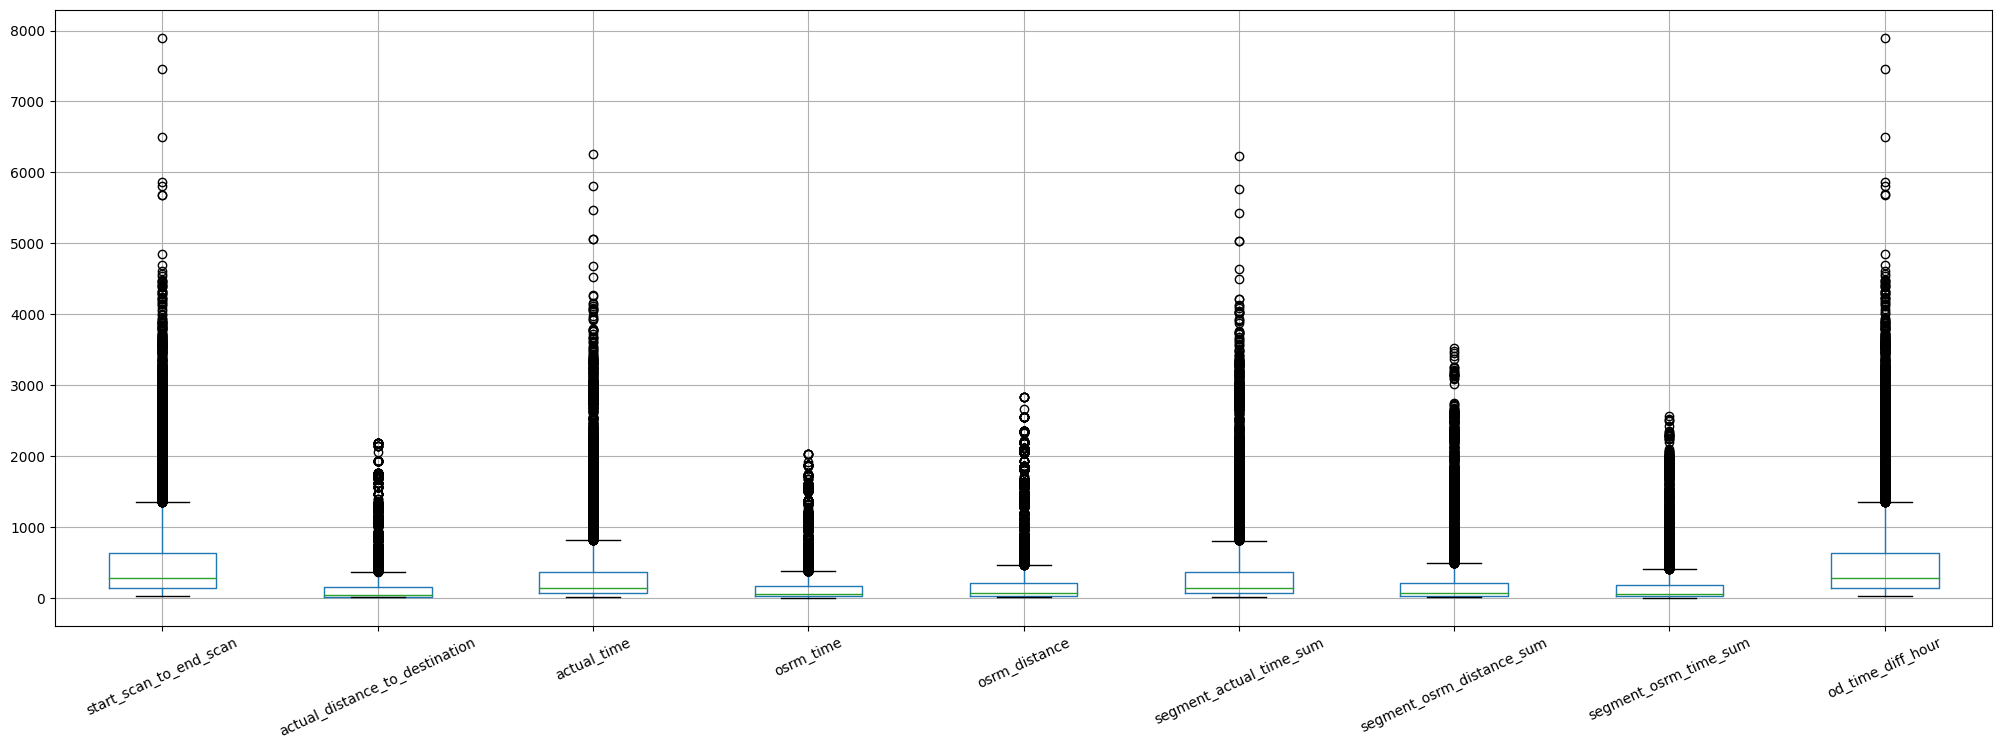

In [ ]:
trip_details[num_cols].boxplot(rot=25, figsize=(25,8))

In [ ]:
Q1 = trip_details[num_cols].quantile(0.25)
Q3 = trip_details[num_cols].quantile(0.75)

IQR = Q3 - Q1
trip_details = trip_details[-((trip_details[num_cols] < (Q1 - 1.5 * IQR)) | (trip_details[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip_details = trip_details.reset_index(drop=True)
trip_details

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_place,destination_state,destination_city,destination_place,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,ChikaDPP,karnataka,doddablpur,chikadpp,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,Hub,maharashtra,mumbai,mirard,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,Bellary,karnataka,sandur,wrdn1dpp,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,Chennai,tamil nadu,chennai,chennai,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,Chrompet,tamil nadu,chennai,vandalur,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,Mehmdpur,punjab,chandigarh,mehmdpur,2018,10,23,3,40,2
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,Balabhgarh,haryana,faridabad,blbgarh,2018,10,23,3,40,2
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,GovndNgr,uttar pradesh,kanpur,govndngr,2018,10,23,3,40,2
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,VdkkuSrt,tamil nadu,tirchchndr,shnmgprm,2018,10,23,3,40,2


<Axes: >

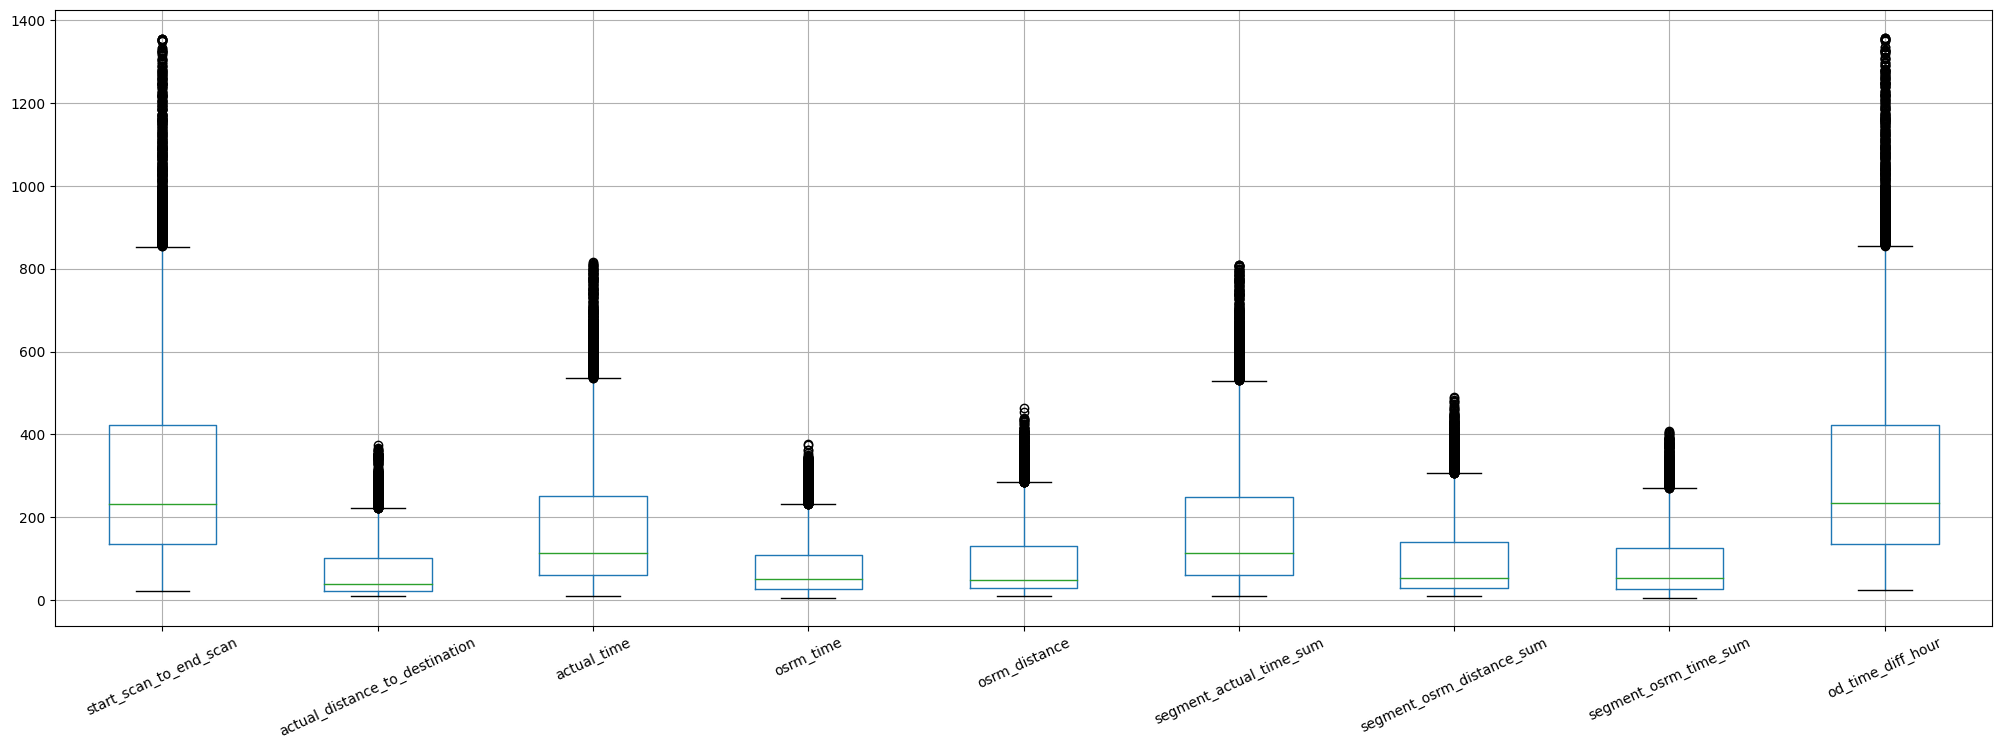

In [ ]:
trip_details[num_cols].boxplot(rot=25, figsize=(25,8))

In [ ]:
trip_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12723 entries, 0 to 12722
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            12723 non-null  object        
 1   trip_creation_time              12723 non-null  datetime64[ns]
 2   route_schedule_uuid             12723 non-null  object        
 3   route_type                      12723 non-null  object        
 4   trip_uuid                       12723 non-null  object        
 5   source_center                   12723 non-null  object        
 6   source_name                     12723 non-null  object        
 7   destination_center              12723 non-null  object        
 8   destination_name                12723 non-null  object        
 9   start_scan_to_end_scan          12723 non-null  float64       
 10  od_time_diff_hour               12723 non-null  float64       
 11  ac

In [ ]:
trip_details['data'].value_counts()/len(trip_details)*100

,count
data,
training,71.500432
test,28.499568


In [ ]:
trip_details['route_type'].value_counts()/len(trip_details)*100

,count
route_type,
Carting,69.260395
FTL,30.739605


In [ ]:
temp=trip_details['start_scan_to_end_scan'].value_counts()
temp.sort_index(ascending=False).head(20)

,count
start_scan_to_end_scan,
1355.0,4
1353.0,1
1351.0,1
1350.0,1
1349.0,2
1333.0,2
1327.0,2
1326.0,1
1325.0,1


In [ ]:
trip_details['source_state'].value_counts()

,count
source_state,
Maharashtra,2308
Karnataka,2025
Haryana,1365
Tamil Nadu,1032
Telangana,701
Delhi,658
Gujarat,656
Uttar Pradesh,619
West Bengal,551


In [ ]:
trip_details['source_city'].value_counts()

,count
source_city,
Bengaluru,1034
Mumbai,967
Gurgaon,745
Bangalore,568
Bhiwandi,540
...,...
Banka,1
Makrana,1
Hailakandi,1


In [ ]:
# I analysed that bangalore and bengaluru is given as 2 different names in dataset which needs to be rectified
trip_details.replace('Bangalore','Bengaluru',inplace=True)

In [ ]:
trip_details['source_city'].value_counts()

,count
source_city,
Bengaluru,1602
Mumbai,967
Gurgaon,745
Bhiwandi,540
Delhi,481
...,...
Banka,1
Makrana,1
Hailakandi,1


In [ ]:
trip_details[['source_city','source_place']].value_counts()

,,count
source_city,source_place,
Gurgaon,Bilaspur,691
Bengaluru,Nelmngla,544
Bhiwandi,Mankoli,540
Bengaluru,Bomsndra,440
Mumbai,Hub,300
...,...,...
Dhaka,PchpkrRD,1
Dharamshala,GrudwrRd,1
Moradabad,Moradabad,1


In [ ]:
trip_details['destination_state'].value_counts()

,count
destination_state,
maharashtra,2285
karnataka,2070
haryana,1333
tamil nadu,1040
telangana,682
gujarat,653
uttar pradesh,620
delhi,579
west bengal,559


In [ ]:
trip_details['destination_city'].value_counts()

,count
destination_city,
mumbai,1200
bengaluru,1073
gurgaon,610
delhi,476
hyderabad,411
...,...
chapra,1
shamshabad,1
kullu,1


In [ ]:
trip_details[['destination_city','destination_place']].value_counts()

,,count
destination_city,destination_place,
gurgaon,bilaspur,597
bangalore,nelmngla,386
bhiwandi,mankoli,377
bengaluru,bomsndra,331
sonipat,kundli,282
...,...,...
bolpur,webeldpp,1
bodhan,suryadpp,1
raipur,byprddpp,1


In [ ]:
trip_details['trip_day'].value_counts().reset_index().sort_values(by='trip_day')

,trip_day,count
18,1,513
20,2,487
14,3,551
3,12,638
2,13,652
7,14,616
1,15,677
19,16,508
6,17,622
0,18,696


In [ ]:
trip_details['trip_hour'].value_counts().reset_index()

,trip_hour,count
0,23,990
1,22,969
2,20,933
3,0,899
4,21,755
5,19,677
6,1,637
7,2,607
8,18,587
9,3,574


In [ ]:
trip_details['trip_week'].value_counts().reset_index().sort_values(by='trip_week')

,trip_week,count
2,37,3091
0,38,4275
1,39,3806
3,40,1551


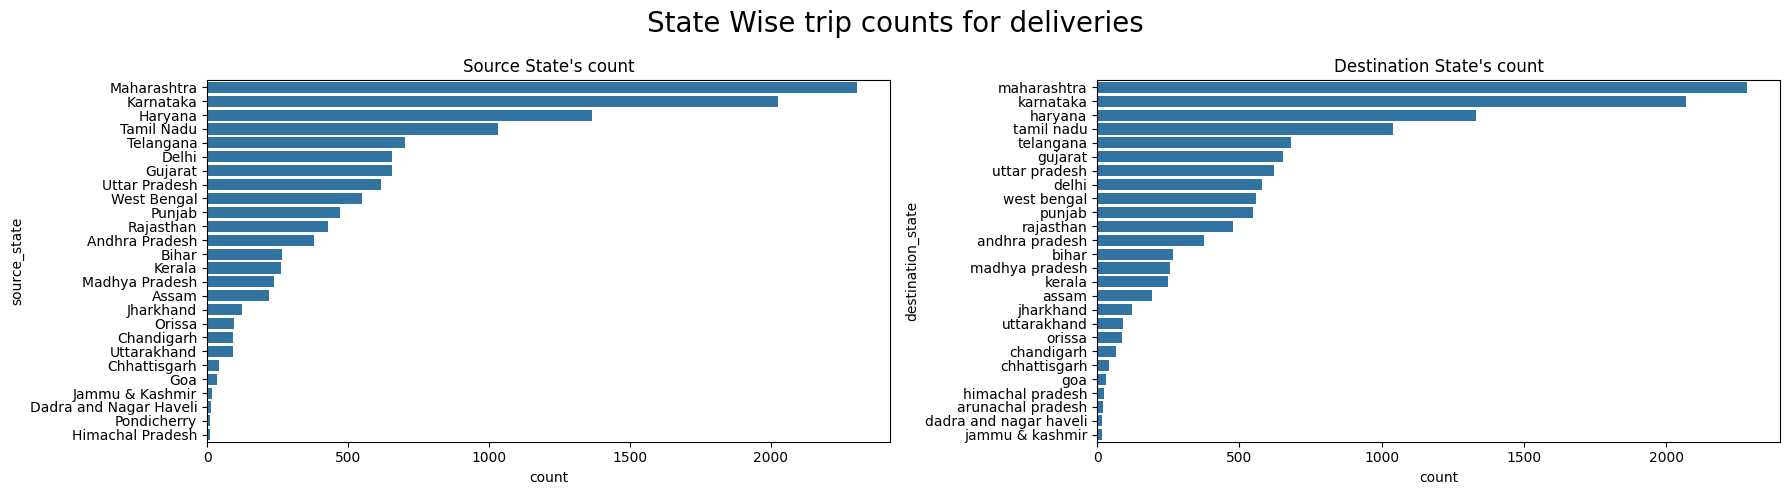

In [ ]:
plt.figure(figsize=(18,5))
plt.suptitle('State Wise trip counts for deliveries',fontsize=20)

plt.subplot(1,2,1)
plt.title("Source State's count")
source_counts=trip_details['source_state'].value_counts()
source_counts=source_counts[source_counts>=10]
sns.barplot(y=source_counts.index,x=source_counts,orient='h')
plt.tight_layout()

plt.subplot(1,2,2)
plt.title("Destination State's count")
dest_counts=trip_details['destination_state'].value_counts()
dest_counts=dest_counts[dest_counts>=10]
sns.barplot(y=dest_counts.index,x=dest_counts,orient='h')
plt.tight_layout()

plt.show()

<Axes: xlabel='data', ylabel='count'>

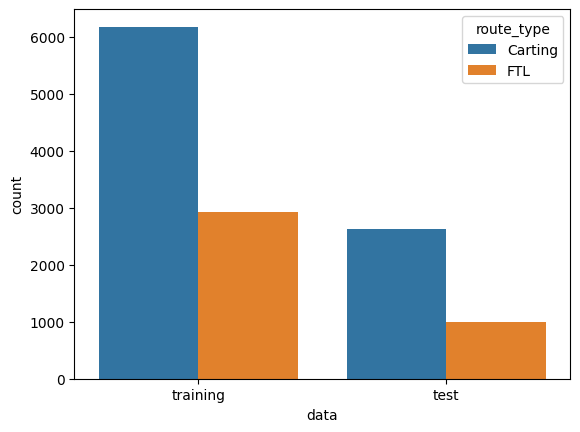

In [ ]:
sns.countplot(data=trip_details,x='data',hue='route_type')

In [ ]:
num_cols=['start_scan_to_end_scan','actual_time', 'actual_time','osrm_time','osrm_time','actual_distance_to_destination','osrm_distance','osrm_distance']

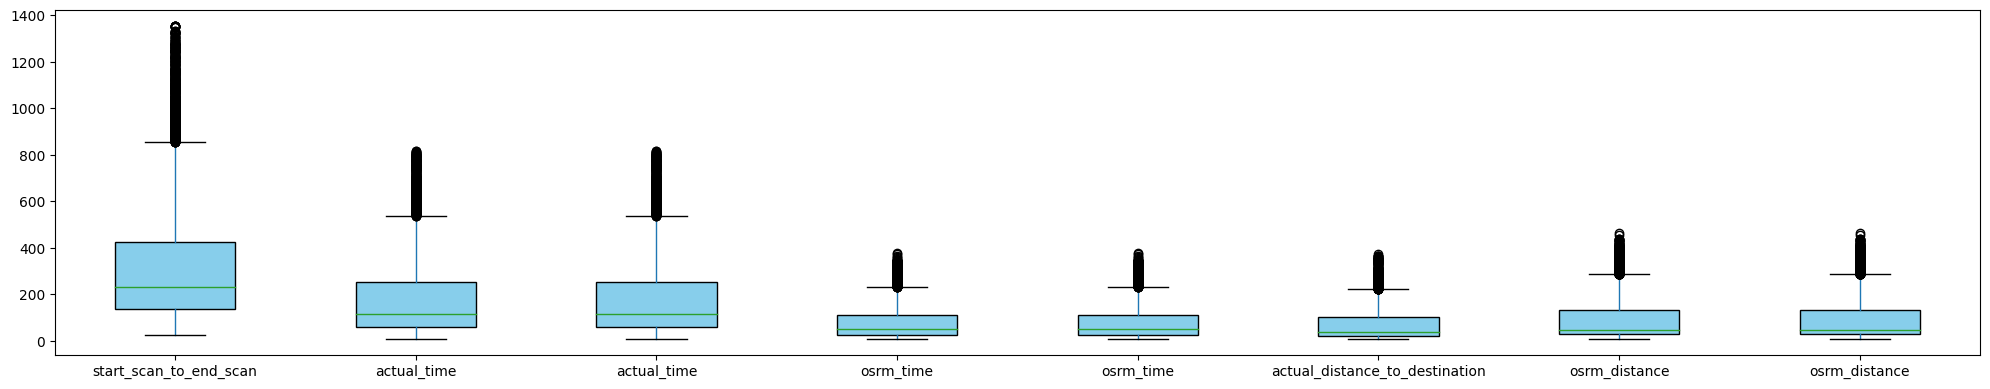

In [ ]:
plt.figure(figsize=(20,4))
trip_details[num_cols].boxplot(grid=False,patch_artist=True, boxprops=dict(facecolor='skyblue'),color='')
plt.tight_layout()
plt.show()

<Figure size 2000x400 with 0 Axes>

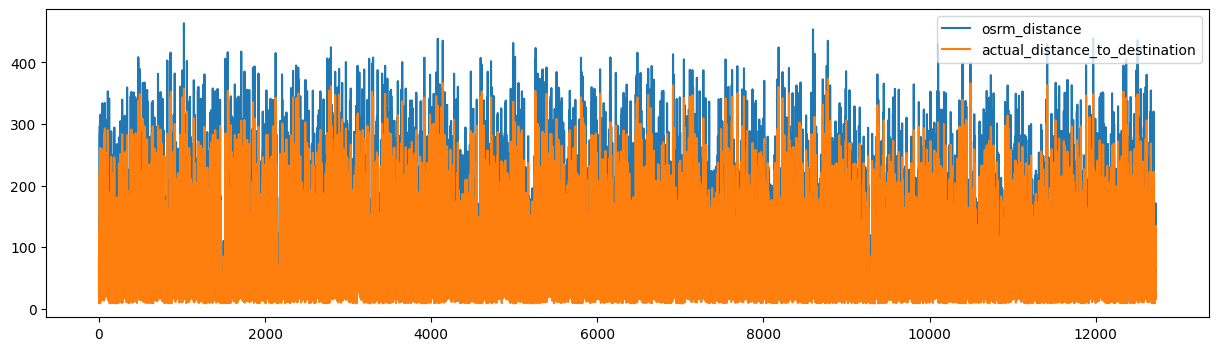

In [ ]:
plt.figure(figsize=(20,4))
ax=trip_details[['osrm_distance','actual_distance_to_destination']].plot(kind='line')
ax.figure.set_size_inches(15, 4)
plt.show()

<Figure size 2000x400 with 0 Axes>

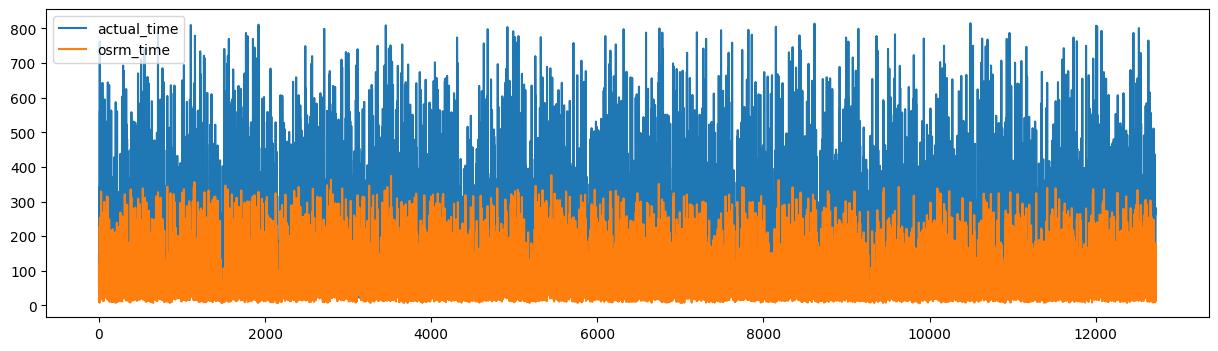

In [ ]:
plt.figure(figsize=(20,4))
ax=trip_details[['actual_time','osrm_time']].plot(kind='line')
ax.figure.set_size_inches(15, 4)
plt.show()

<Figure size 2000x400 with 0 Axes>

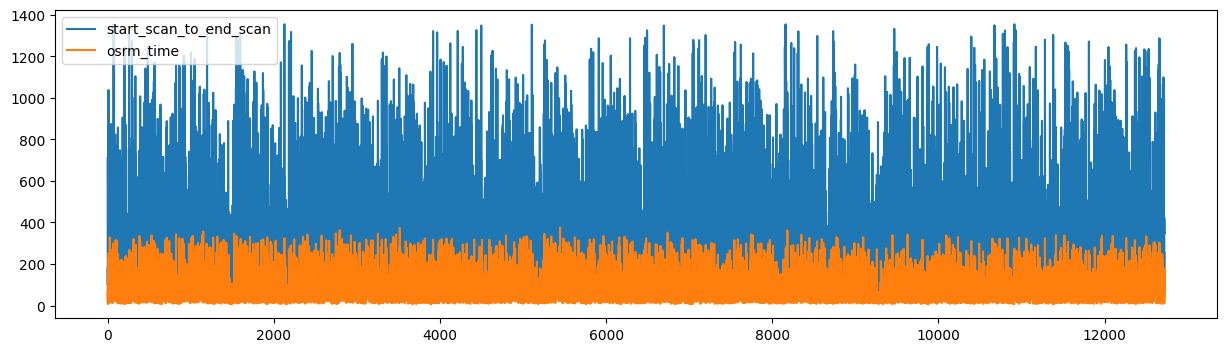

In [ ]:
plt.figure(figsize=(20,4))
ax=trip_details[['start_scan_to_end_scan','osrm_time']].plot(kind='line')
ax.figure.set_size_inches(15, 4)
plt.show()

<ipython-input-60-2bd3cf659e35>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1=trip_details.groupby(['source_state','source_city','destination_state','destination_city']).agg({'actual_distance_to_destination':sum,'actual_time':'sum'})


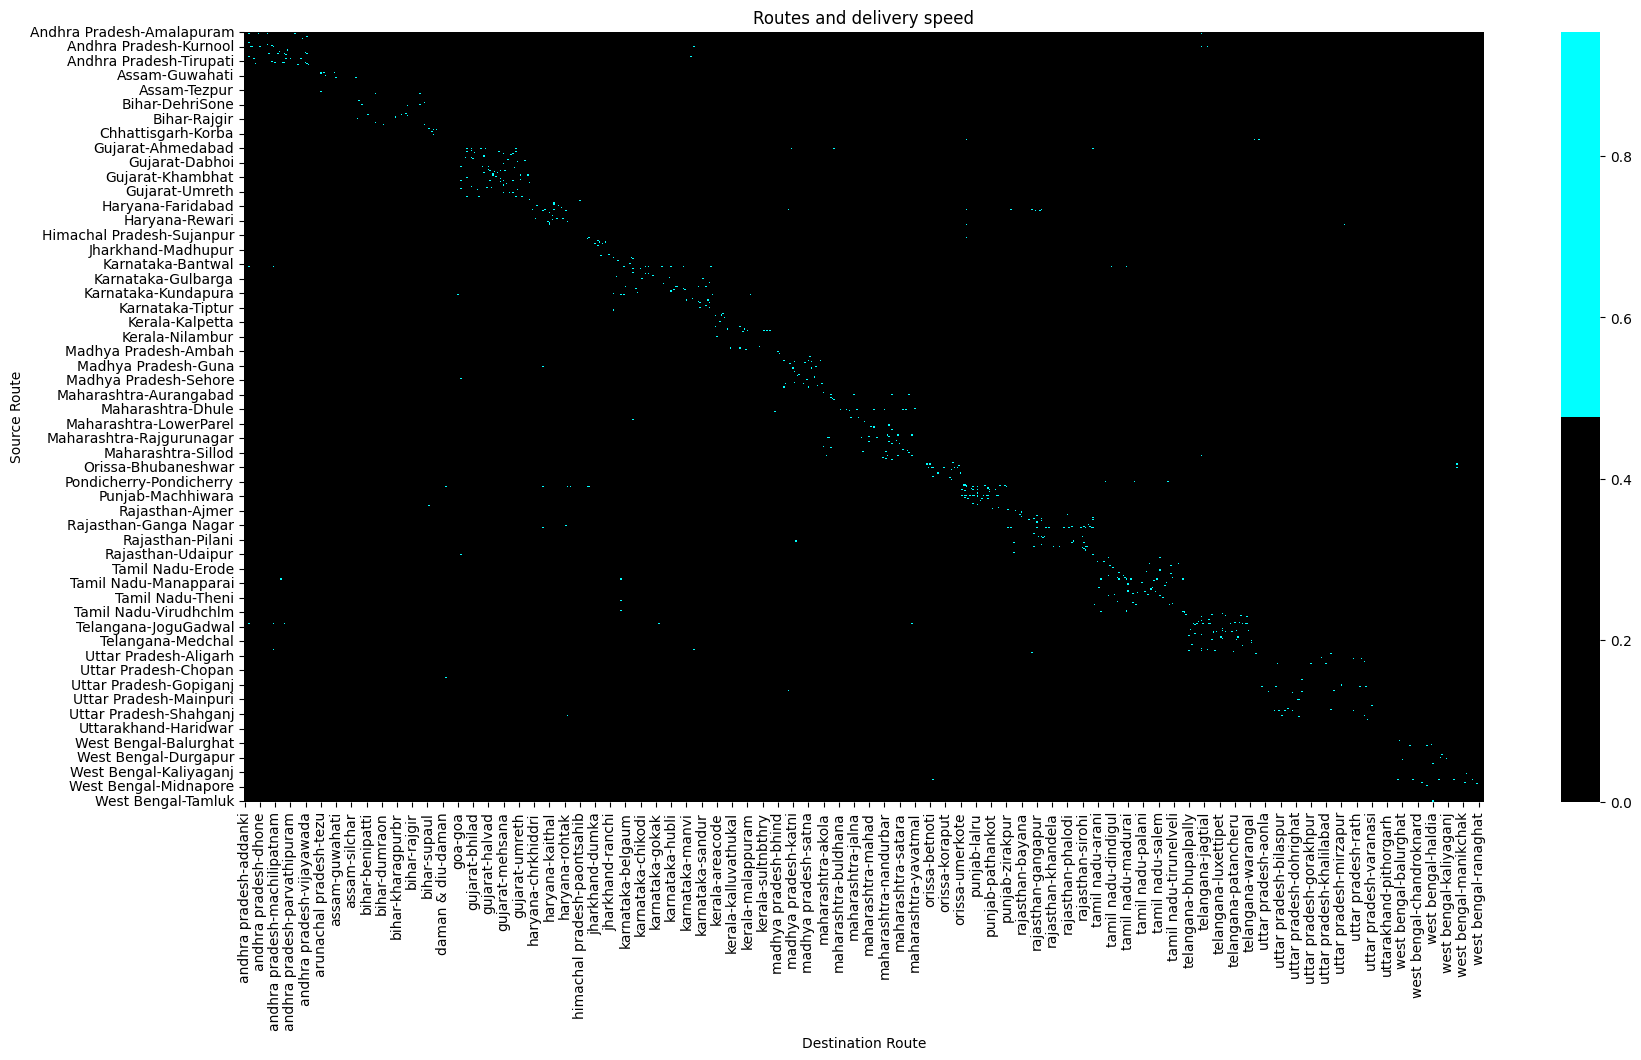

In [ ]:
df1=trip_details.groupby(['source_state','source_city','destination_state','destination_city']).agg({'actual_distance_to_destination':sum,'actual_time':'sum'})
df1['speed']=df1['actual_distance_to_destination']/df1['actual_time']
df_cross1=df1.pivot_table(index=['source_state','source_city'],columns=['destination_state','destination_city'],values='speed',fill_value=0)
plt.figure(figsize=(20,10))
plt.title('Routes and delivery speed')
sns.heatmap(df_cross1,cmap=['black','cyan'])
plt.ylabel("Source Route")
plt.xlabel("Destination Route")
plt.show()

# ***Hypothesis Testing***

In [ ]:
from scipy.stats import ttest_ind

**Check if there is any significant difference between actual_time aggregated value and OSRM time aggregated value.**

STEP - 1 : SET NULL AND ALTERNATE HYPOTHESIS

H0 - actual_time is not greater than osrm_time (Expected total trip time)

Ha - actual_time is greater than osrm_time (Expected total trip time).

STEP - 2 : SETTING CONFIDENCE LEVEL

Lets take the significance level to be 95%.

STEP - 3 : CHOOSING THE RIGHT DISTRIBUTION AND TEST STATISTICS

As we can see, we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but it is assumed almost every population distribution in world follows the normal distribution we are assuming it.
AS we dont know the population parameters doing testing with T Statistics

STEP - 4 : IDENTIFYING THE TAIL

We are finding the difference between 2 columns so assuming it to be right tail.

STEP - 5 : COMPUTE P-VALUE

In [ ]:
ttest,pval=ttest_ind(trip_details['actual_time'],trip_details['osrm_time'],alternative='greater')
print(f"P Value is {pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("Reject H0, the null hypothesis and concludes that actual_time is significantly greater than osrm_time.")
else:
  print("Fail to reject the null Hypothesis. actual_time is not statistically greater than osrm_time")

P Value is 0.0
Alpha is 0.05
We reject the null hypothesis and concludes that actual_time is significantly greater than osrm_time.


**Check if there is any significant difference between actual_time aggregated value and segment actual time aggregated
value.**

STEP - 1 : SET NULL AND ALTERNATE HYPOTHESIS

H0 - actual_time is not statistically different than segment_actual_time.

Ha - actual_time is statistically different than segment_actual_time.

STEP - 2 : SETTING CONFIDENCE LEVEL

Lets take the significance level to be 95%. Therefore, alpha = 0.05

STEP - 3 : CHOOSING THE RIGHT DISTRIBUTION AND TEST STATISTICS

As we can see, we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but it is assumed almost every population distribution in world follows the normal distribution we are assuming it.
AS we dont know the population parameters doing testing with T Statistics

STEP - 4 : IDENTIFYING THE TAIL

We are finding the difference between 2 columns so assuming it to be two tail.

STEP - 5 : COMPUTE P-VALUE

In [ ]:
ttest,pval=ttest_ind(data['actual_time'],data['segment_actual_time'])
print(f"P Value is {'%1.4f'%pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("Reject H0, the null hypothesis and concludes that actual_time is significantly different than segment_actual_time.")
else:
  print("Fail to reject the null Hypothesis. actual_time is not statistically different than segment_actual_time.")

P Value is 0.0000
Alpha is 0.05
We reject the null hypothesis and concludes that actual_time is significantly different than segment_actual_time.


**Check if there is any significant difference between osrm_distance and segment_osrm_distance**

STEP - 1 : SET NULL AND ALTERNATE HYPOTHESIS

H0 - osrm_distance is not statistically different than segment_osrm_distance.

Ha - osrm_distance is statistically different than segment_osrm_distance.

STEP - 2 : SETTING CONFIDENCE LEVEL

Lets take the significance level to be 95%. Therefore, alpha = 0.05

STEP - 3 : CHOOSING THE RIGHT DISTRIBUTION AND TEST STATISTICS

As we can see, we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but it is assumed almost every population distribution in world follows the normal distribution we are assuming it.
AS we dont know the population parameters doing testing with T Statistics

STEP - 4 : IDENTIFYING THE TAIL

We are finding the difference between 2 columns so assuming it to be two tail.

STEP - 5 : COMPUTE P-VALUE

In [ ]:
tstat,pval=ttest_ind(data['osrm_distance'],data['segment_osrm_distance'])
print(f"P Value is {pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("Reject H0, the null hypothesis and concludes that osrm_distance is significantly different than segment_osrm_distance.")
else:
  print("Fail to reject the null Hypothesis. osrm_distance is not statistically different than segment_osrm_distance.")

P Value is 0.0
Alpha is 0.05
We reject the null hypothesis and concludes that osrm_distance is significantly different than segment_osrm_distance.


**Check if there is any significant difference between osrm_time and segment_osrm_time**

STEP - 1 : SET NULL AND ALTERNATE HYPOTHESIS

H0 - osrm_time is not statistically different than segment_osrm_time.

Ha - osrm_time is statistically different than segment_osrm_time.

STEP - 2 : SETTING CONFIDENCE LEVEL

Lets take the significance level to be 95%. Therefore, alpha = 0.05

STEP - 3 : CHOOSING THE RIGHT DISTRIBUTION AND TEST STATISTICS

As we can see, we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but it is assumed almost every population distribution in world follows the normal distribution we are assuming it. AS we dont know the population parameters doing testing with T Statistics

STEP - 4 : IDENTIFYING THE TAIL

We are finding the difference between 2 columns so assuming it to be two tail.

STEP - 5 : COMPUTE P-VALUE

In [ ]:
ttest_ind(data['osrm_time'],data['segment_osrm_time'])
print(f"P Value is {pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("Reject H0, the null hypothesis and concludes that osrm_time is significantly different than segment_osrm_time.")
else:
  print("Fail to reject the null Hypothesis. osrm_time is not statistically different than segment_osrm_time.")

P Value is 0.0
Alpha is 0.05
We reject the null hypothesis and concludes that osrm_time is significantly different than segment_osrm_time.


# Insights


*   The training data is 71.5% while the testing data is 28.5%
*   60% of the deliveries are carting based while 40% are full truck loading deliveries.


*   Most orders went from and to Maharashtra followed by Karnataka and Haryana while the least from Nagaland, Mizoram and Arunachal Pradesh.
*   The least deliveries were made to Tripura, Nagaland and Daman & Diu.


*   As we have data only from 12 sept, 2018 to 3 October, 2018 which is less than a month, we can't decide about some days but among the given data the most orders were made in September and comparatively less in starting days of October and ending days of September.
*   Most orders were made on Mondays while least on Sundays.

*   The highest speed of delivery is for destination Delhi, Hyderabad, Telangana and Ahmedabad









# **Recommendations**



*   Actual time taking in deliveries are very high. The reason could be the more resting period and no enough transports available.
*   osrm_time and actual_time are different. Team needs to make sure this difference is reduced

*   We have seen that most of the deliveries are within same state and cities too where speed of delivery is high but less than expected time. so need to ensure local area deliveries via two wheeleres riders etc.

*   Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results



*   Need to ensure more speedy deivery in those routes like Bengaluru to Chandigarh, Kolkata, Gurgaon etc by ensuring free loaded trucks to be sent directly rather than stopping in between.








In [ ]:
%%shell
jupyter nbconvert --to html /content/delhivery_case_study.ipynb

[NbConvertApp] Converting notebook /content/delhivery_case_study.ipynb to html
[NbConvertApp] Writing 1900732 bytes to /content/delhivery_case_study.html
